In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate a random data set
arr = np.random.randn(50, 100)
# Inject some missing data mimicing data entry mistakes, subjects not reporting, etc.
arr[abs(arr) > 2.0] = np.nan
df_missing = pd.DataFrame(arr)

In [3]:
# Attrition, missing data after a certain timepoint
df_missing.iloc[6, 9:] = np.nan
df_missing.iloc[10, 70:] = np.nan
df_missing.iloc[13, 30:] = np.nan
df_missing.iloc[28, 21:] = np.nan
# Data collection errors resulting some data not collected systematically
df_missing.iloc[:, 7] = np.nan
df_missing.iloc[:, 18] = np.nan

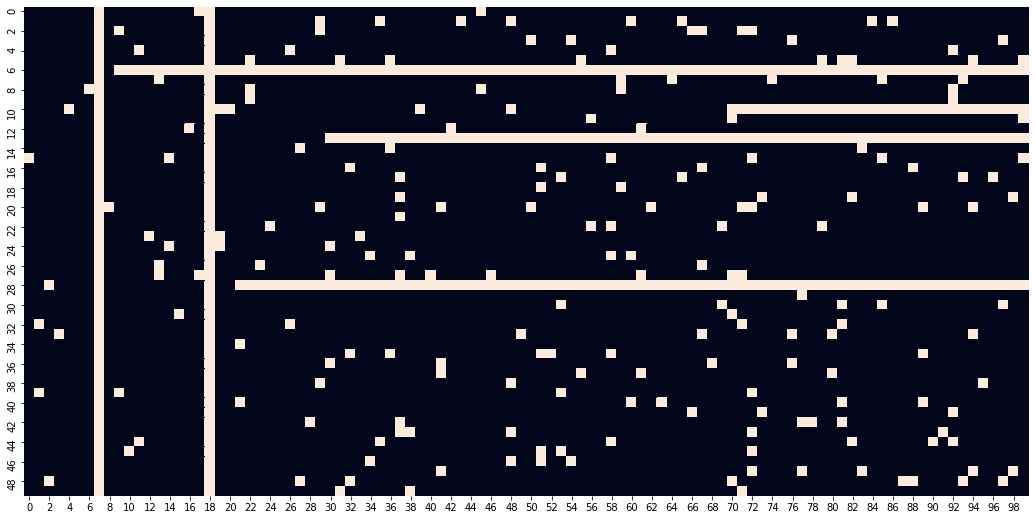

In [4]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_missing.isnull(), cbar=False)

In [5]:
arr_boxplot = np.random.randn(10000)

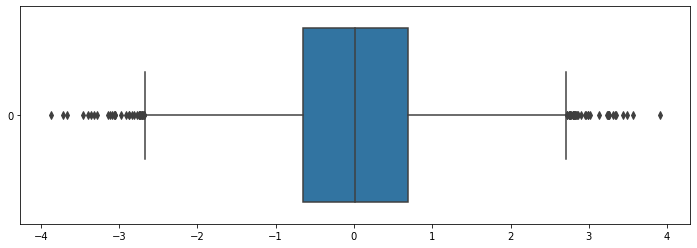

In [6]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=arr_boxplot, orient='h')

In [7]:
# Generate random numbers that have linear relationships
x = np.random.rand(100)
y = 2 * x + 1 + .1 * np.random.randn(100)

In [8]:
# Aritifically set some outliers
x[5:9] = [0.2, 0.4, 0.6, 0.8]
y[5:9] = [2.5, 1.0, 3.0, 1.2]

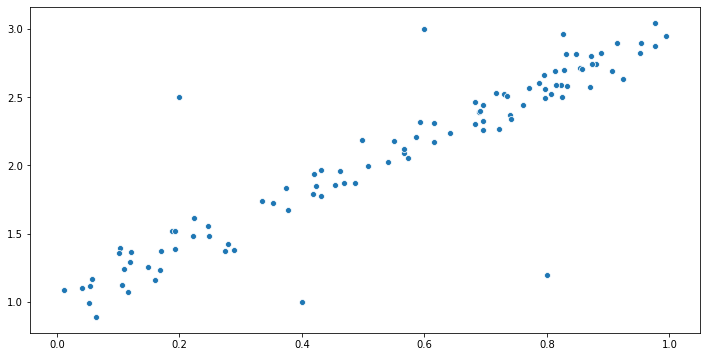

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x, y=y)

In [10]:
# Read the data
df_tobacco = pd.read_csv('tobacco.csv')
# Check the data information
# df_tobacco.info()
# df_tobacco.head()
# df_tobacco["State"].unique()

In [11]:
# Select the data that are the national averages
national_only = df_tobacco["State"] == "Nationwide (States and DC)"
cols = ["Year", "Smoke everyday", "Former smoker"]
df_national = df_tobacco.loc[national_only, cols].copy()

In [12]:
# Recode the percentage string data to float
df_national["smoke_everyday"] = df_national["Smoke everyday"].map(lambda x: float(x[:-1]))
df_national["smoke_former"] = df_national["Former smoker"].map(lambda x: float(x[:-1]))

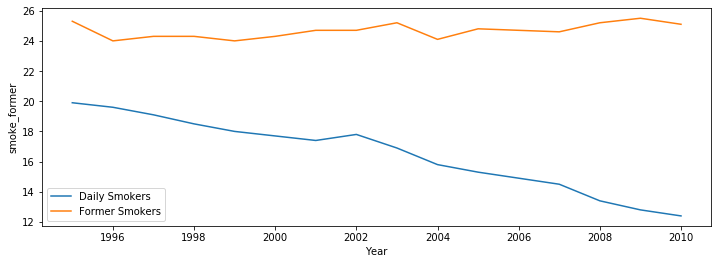

In [13]:
# Plot the rate over the years
plt.figure(figsize=(12, 4))
sns.lineplot(x=df_national["Year"], y=df_national["smoke_everyday"], label="Daily Smokers")
sns.lineplot(x=df_national["Year"], y=df_national["smoke_former"], label="Former Smokers")

In [77]:
# Generate some simulation data
abc_female = pd.Series(np.random.rand(100), index=['Female']*100, name='ABC')
abc_male = pd.Series(np.random.rand(100) + 0.2, index=['Male']*100, name='ABC')
abc = pd.concat([abc_female, abc_male], axis=0).reset_index()
abc.rename(columns={'index': 'Sex'}, inplace=True)
# Check data information
# abc.head()

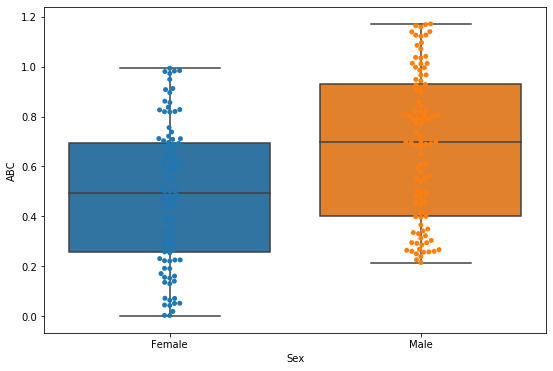

In [78]:
# Generate the plot
plt.figure(figsize=(9, 6))
sns.boxplot(x="Sex", y="ABC", data=abc, whis=np.inf)
sns.swarmplot(x="Sex", y="ABC", data=abc)